In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.algorithms.linear_solvers.hhl import HHL
from math import pi, atan, log10
import numpy as np

## samples from MNIST

In [2]:
sample_data = {
    0: [
        [0.9956521206912666, 0.09314963533467721],
        [0.2424761686211572, -0.9701573623133538],
        [0.3090424127497972, 0.9510482569889835],
        [0.9773397149232854, 0.21167683301124735],
        [-0.3038216268790871, -0.9527289326143847],
        [0.3163115312630537, -0.9486553721926747],
        [-0.9288552206622026, -0.3704429497892635],
        [0.8890107669572688, -0.4578862918171375],
        [0.9333055286224707, -0.35908326366280346],
    ],
    1: [
        [0.806600328933814, 0.5910972080494571],
        [0.7763459862791707, -0.6303069963027713],
        [-0.855661373182786, -0.517536099651946],
        [-0.8460177656724315, -0.5331547056592739],
        [-0.9439951322734825, -0.32995937665714276],
        [0.9763896637352572, -0.2160167228502261],
        [-0.9700968519911586, -0.24271814467988231],
        [-0.9137110293651945, -0.4063645590063147],
        [0.8931667653449796, 0.44972561555151175],
    ],
    2: [
        [0.5626231718140011, -0.8267134730594107],
        [0.9999974263469661, -0.0022687660619699064],
        [0.19294971609044437, -0.9812086460384544],
        [-0.4924989003614522, -0.8703130661680085],
        [0.4046489578449499, -0.914472099582593],
        [0.598140693741117, -0.8013911095656696],
        [-0.287362826027438, -0.9578218029558131],
        [-0.5661859690353817, -0.8242775312159527],
        [-0.20985870525100697, -0.9777317238539266],
    ],
    3: [
        [-0.800215876385337, 0.5997120568913443],
        [0.9255632364473354, 0.37859304713258246],
        [0.23745563680981938, 0.971398384056327],
        [-0.8865842727098362, 0.46256710581662697],
        [0.08440278394911564, 0.9964317187151556],
        [0.5536508274235685, 0.8327489185181798],
        [-0.7622528778553873, 0.6472793447972676],
        [-0.9663744829337596, 0.2571387927452972],
        [-0.992418961484461, 0.12290079286198233],
    ],
    4: [
        [0.8683049749661503, -0.4960307152274273],
        [0.05087353811806258, -0.9987051031807888],
        [-0.9886702518000559, -0.15010374147773234],
        [-0.860657807201803, -0.5091837967793008],
        [-0.9844752997143146, -0.175523172978415],
        [0.9534060888437391, 0.3016899563387624],
        [0.9321515342921673, 0.36206838734796815],
        [0.890099082554819, 0.45576707124919597],
        [0.9740422631312452, 0.22636622900548095],
    ],
    5: [
        [0.18190616974339316, 0.9833158929913053],
        [0.5311375808957558, -0.847285589491645],
        [-0.7794727288990287, -0.6264361618734197],
        [-0.17257861280284734, 0.9849957474035332],
        [-0.49470579248057495, -0.8690605150886596],
        [-0.9905599318894655, 0.13708034627596172],
        [0.7881927891606716, 0.615428409415036],
        [0.9998826676305028, 0.01531832145208842],
        [0.9039018478221851, -0.42773993208916006],
    ],
    6: [
        [-0.9869874274557179, -0.1607974441474243],
        [-0.20062068065628783, -0.979668996392663],
        [0.80413127759967, -0.5944517544645004],
        [0.7321555225009626, -0.681137497772177],
        [0.4973617833238433, -0.8675432303285678],
        [0.44377795385765406, -0.8961367795542787],
        [-0.6724179591245482, -0.7401716613372721],
        [0.25367598743933034, -0.967289250119467],
        [-0.16293524868467188, -0.9866367643343036],
    ],
    7: [
        [-0.5359399693838656, -0.8442560922000037],
        [-0.6630248398067302, 0.748597396334812],
        [-0.8439721538372243, 0.5363869904717644],
        [-0.5460432874565954, 0.8377569625038002],
        [-0.7305810341620098, 0.6828260045742021],
        [-0.5171272581896644, 0.8559085224702697],
        [-0.16183342395536623, 0.9868180900707499],
        [-0.12852025185802873, 0.9917068845492345],
        [0.43305157678359085, 0.9013691429404745],
    ],
    8: [
        [0.6638967103348526, 0.7478242828409363],
        [0.9862173766909255, 0.16545478510115413],
        [0.2134811637630681, 0.9769471801066658],
        [0.8871918751931753, -0.46140066817378717],
        [-0.015475780753977639, 0.99988024293415],
        [0.9966053716213816, -0.0823269898357007],
        [0.9995743616732166, -0.029173540847516746],
        [0.6815848536671074, 0.7317390841355871],
        [-0.9209221660661163, 0.3897465382118133],
    ],
    9: [
        [0.997551898820124, 0.06993003046163304],
        [-0.8501501932010538, -0.5265402634179184],
        [-0.6330182566824322, 0.7741368656166263],
        [-0.5035919705323636, -0.863941622573731],
        [-0.9599524856611257, 0.280162854913042],
        [-0.6861091497860836, 0.7274986148301711],
        [-0.44589010916660154, -0.8950877110917097],
        [-0.532697509280275, 0.8463057152156019],
        [0.9969088132301219, 0.078567283929825],
    ],
}

In [3]:
theta_data = {}
for key, ls in sample_data.items():
    data_dict = {'train': 2*atan(ls[0][1]/ls[0][0])}
    test_ls = []
    for coord in ls[1:]:
        test_ls.append(2*atan(coord[1]/coord[0]))
    data_dict['test'] = test_ls
    theta_data[key] = data_dict

## QSVM circuit

In [4]:
def qsvm_circuit2(train, theta, dot_val):
    q = QuantumRegister(5, name="x")
    c = ClassicalRegister(2, name="c")
    qc = QuantumCircuit(q, c)

    qc.u(-1.57, 0, 0, q[2])    # qc.u3(-1.57, 0, 0, q[2])

    qc.barrier()

    qc.h(q[0])
    qc.h(q[1])

    qc.barrier()

    qc.p(3.17, q[0])    # qc.u1(3.17, q[0])
    qc.p(1.59, q[1])    # qc.u1(1.59, q[1])
    # qc.cu3(pi, pi/2, -pi/2, q[0], q[2])
    qc.cu(2*dot_val*pi, pi/2, -pi/2, 0, q[0], q[2])
    # qc.cu3(pi/2, pi/2, -pi/2, q[1], q[2])
    qc.cu(dot_val*pi, pi/2, -pi/2, 0, q[1], q[2])

    qc.barrier()

    qc.h(q[1])
    qc.cp(-pi/2, q[0], q[1])    # qc.cu1(-pi/2, q[0], q[1])
    qc.h(q[0])

    qc.barrier()

    qc.cry(pi/4, q[0], q[3])
    qc.cry(pi/8, q[1], q[3])

    qc.barrier()

    qc.h(q[0])
    qc.cp(pi/2, q[0], q[1])    # qc.cu1(pi/2, q[0], q[1])
    qc.h(q[1])

    qc.barrier()

    qc.p(-1.59, q[0])
    qc.p(-3.17, q[1])
    # qc.cu3(-pi/2, pi/2, -pi/2, q[0], q[2])
    qc.cu(-dot_val*pi, pi/2, -pi/2, 0, q[0], q[2])
    # qc.cu3(-pi, pi/2, -pi/2, q[1], q[2])
    qc.cu(-2*dot_val*pi, pi/2, -pi/2, 0, q[1], q[2])

    qc.barrier()

    qc.h(q[0])
    qc.h(q[1])

    qc.barrier()

    qc.x(q[2])
    qc.ccx(q[2], q[3], q[4])
    qc.x(q[2])
    qc.cry(train[0], q[4], q[1])
    qc.x(q[2])
    qc.ccx(q[2], q[3], q[4])
    qc.x(q[2])

    qc.barrier()

    qc.ccx(q[2], q[3], q[4])
    qc.cry(train[1], q[4], q[1])
    qc.ccx(q[2], q[3], q[4])

    qc.barrier()

    qc.cry(-theta, q[3], q[1])
    qc.ch(q[3], q[2])

    qc.barrier()

    qc.h(q[3])
    qc.measure(q[3], c[0])
    qc.h(q[0])
    qc.measure(q[0], c[1])

    return qc

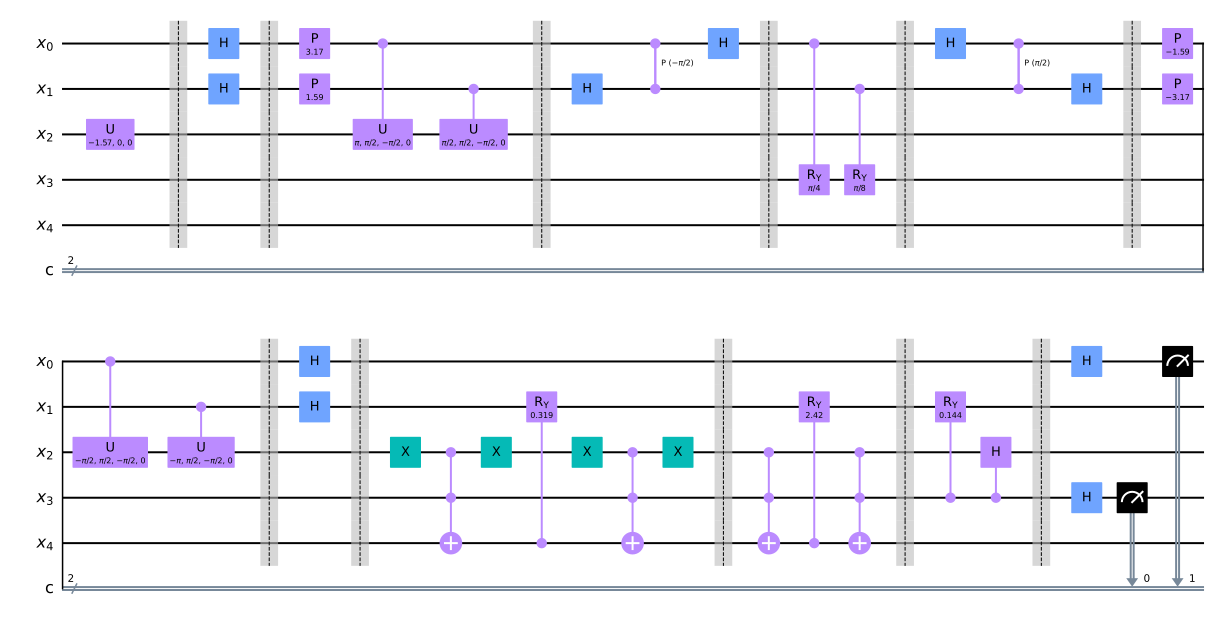

In [5]:
qc = qsvm_circuit2([0.3194, 2.4174], -0.14415, 0.5)
qc.draw(fold=25, output='mpl')

## 6/9 dataset

In [6]:
thetas = [-0.14415, 2.4519, 2.8465, 0.0499, -0.05998, 2.2331, -0.32316, 2.7939]
suredeg = []
counts = []
for theta in thetas:
    qc = qsvm_circuit2([0.3194, 2.4174], theta, 0.5)
    simulator = Aer.get_backend('qasm_simulator')

    job = execute(qc, simulator, shots=8192)
    result = job.result().get_counts()
    result = {key[1]: val for key, val in result.items() if key[0] == '0'}
    suredeg.append(round(100*log10(result['0'] / result['1']), 0))
    if result['0'] > result['1']:
        counts.append(0)
    else:
        counts.append(1)
print(suredeg)
print(counts)

match = 0
for i in range(8):
    if i in [0, 3, 4, 6] and counts[i] == 0:
        match += 1
    if i in [1, 2, 5, 7] and counts[i] == 1:
        match += 1
print(match/8 * 100, end='%\n')

[13.0, -24.0, -26.0, 10.0, 11.0, -22.0, 15.0, -25.0]
[0, 1, 1, 0, 0, 1, 0, 1]
100.0%


------
## The labels below are [0, 0, 0, 0, 1, 1, 1, 1]

## 0/1 dataset

In [7]:
thetas = theta_data[0]['test'][1:5] + theta_data[1]['test'][1:5]
train = [theta_data[0]['train'], theta_data[1]['train']]
dot_val = sample_data[0][0][0]*sample_data[1][0][0] + \
    sample_data[0][0][1]*sample_data[1][0][1]
suredeg = []
counts = []
for theta in thetas:
    qc = qsvm_circuit2(train, theta, dot_val)
    simulator = Aer.get_backend('qasm_simulator')

    job = execute(qc, simulator, shots=8192)
    result = job.result().get_counts()
    result = {key[1]: val for key, val in result.items() if key[0] == '0'}
    suredeg.append(round(100*log10(result['0'] / result['1']), 0))
    if result['0'] > result['1']:
        counts.append(0)
    else:
        counts.append(1)
print(suredeg)
print(counts)

match = 0
for i in range(8):
    if i <= 3 and counts[i] == 0:
        match += 1
    if i >= 4 and counts[i] == 1:
        match += 1
print(match/8 * 100, end='%\n')

[-7.0, -0.0, -5.0, 5.0, -1.0, -2.0, -2.0, 2.0]
[1, 1, 1, 0, 1, 1, 1, 0]
50.0%


## 2/3 dataset

In [8]:
thetas = theta_data[2]['test'][1:5] + theta_data[3]['test'][1:5]
train = [theta_data[2]['train'], theta_data[3]['train']]
dot_val = sample_data[2][0][0]*sample_data[3][0][0] + \
    sample_data[2][0][1]*sample_data[3][0][1]
suredeg = []
counts = []
for theta in thetas:
    qc = qsvm_circuit2(train, theta, dot_val)
    simulator = Aer.get_backend('qasm_simulator')

    job = execute(qc, simulator, shots=8192)
    result = job.result().get_counts()
    result = {key[1]: val for key, val in result.items() if key[0] == '0'}
    suredeg.append(round(100*log10(result['0'] / result['1']), 0))
    if result['0'] > result['1']:
        counts.append(0)
    else:
        counts.append(1)
print(suredeg)
print(counts)

match = 0
for i in range(8):
    if i <= 3 and counts[i] == 0:
        match += 1
    if i >= 4 and counts[i] == 1:
        match += 1
print(match/8 * 100, end='%\n')

[-35.0, 8.0, -43.0, -43.0, 19.0, -47.0, 26.0, 5.0]
[1, 0, 1, 1, 0, 1, 0, 0]
25.0%


## 4/5 dataset

In [9]:
thetas = theta_data[4]['test'][1:5] + theta_data[5]['test'][1:5]
train = [theta_data[4]['train'], theta_data[5]['train']]
dot_val = sample_data[4][0][0]*sample_data[5][0][0] + \
    sample_data[4][0][1]*sample_data[5][0][1]
suredeg = []
counts = []
for theta in thetas:
    qc = qsvm_circuit2(train, theta, dot_val)
    simulator = Aer.get_backend('qasm_simulator')

    job = execute(qc, simulator, shots=8192)
    result = job.result().get_counts()
    result = {key[1]: val for key, val in result.items() if key[0] == '0'}
    suredeg.append(round(100*log10(result['0'] / result['1']), 0))
    if result['0'] > result['1']:
        counts.append(0)
    else:
        counts.append(1)
print(suredeg)
print(counts)

match = 0
for i in range(8):
    if i <= 3 and counts[i] == 0:
        match += 1
    if i >= 4 and counts[i] == 1:
        match += 1
print(match/8 * 100, end='%\n')

[-7.0, -26.0, -10.0, -14.0, -33.0, 58.0, -49.0, 9.0]
[1, 1, 1, 1, 1, 0, 1, 0]
25.0%


## 7/8 dataset

In [10]:
thetas = theta_data[7]['test'][1:5] + theta_data[8]['test'][1:5]
train = [theta_data[7]['train'], theta_data[8]['train']]
dot_val = sample_data[7][0][0]*sample_data[8][0][0] + \
    sample_data[7][0][1]*sample_data[8][0][1]
suredeg = []
counts = []
for theta in thetas:
    qc = qsvm_circuit2(train, theta, dot_val)
    simulator = Aer.get_backend('qasm_simulator')

    job = execute(qc, simulator, shots=8192)
    result = job.result().get_counts()
    result = {key[1]: val for key, val in result.items() if key[0] == '0'}
    suredeg.append(round(100*log10(result['0'] / result['1']), 0))
    if result['0'] > result['1']:
        counts.append(0)
    else:
        counts.append(1)
print(suredeg)
print(counts)

match = 0
for i in range(8):
    if i <= 3 and counts[i] == 0:
        match += 1
    if i >= 4 and counts[i] == 1:
        match += 1
print(match/8 * 100, end='%\n')

[-10.0, 9.0, -1.0, 11.0, -38.0, -10.0, 31.0, -26.0]
[1, 0, 1, 0, 1, 1, 0, 1]
62.5%


## 6/9 dataset

In [11]:
thetas = theta_data[6]['test'][1:5] + theta_data[9]['test'][1:5]
train = [theta_data[6]['train'], theta_data[9]['train']]
dot_val = sample_data[6][0][0]*sample_data[9][0][0] + \
    sample_data[6][0][1]*sample_data[9][0][1]
suredeg = []
counts = []
for theta in thetas:
    qc = qsvm_circuit2(train, theta, dot_val)
    simulator = Aer.get_backend('qasm_simulator')

    job = execute(qc, simulator, shots=8192)
    result = job.result().get_counts()
    result = {key[1]: val for key, val in result.items() if key[0] == '0'}
    suredeg.append(round(100*log10(result['0'] / result['1']), 0))
    if result['0'] > result['1']:
        counts.append(0)
    else:
        counts.append(1)
print(suredeg)
print(counts)

match = 0
for i in range(8):
    if i <= 3 and counts[i] == 0:
        match += 1
    if i >= 4 and counts[i] == 1:
        match += 1
print(match/8 * 100, end='%\n')

[-32.0, -28.0, -18.0, -14.0, -23.0, -23.0, -41.0, -26.0]
[1, 1, 1, 1, 1, 1, 1, 1]
50.0%
